In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This link would download the data set into our local computer
url = 'https://storage.googleapis.com/kaggle-forum-message-attachments/237294/7771/german_credit_data.csv'

In [ ]:
credit = pd.read_csv(url, header = 0, names = ['Index', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'])

In [ ]:
credit.head()

,Index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit.shape

(1000, 11)

In [ ]:
print(credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [ ]:
credit.isna().sum()

Index                 0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

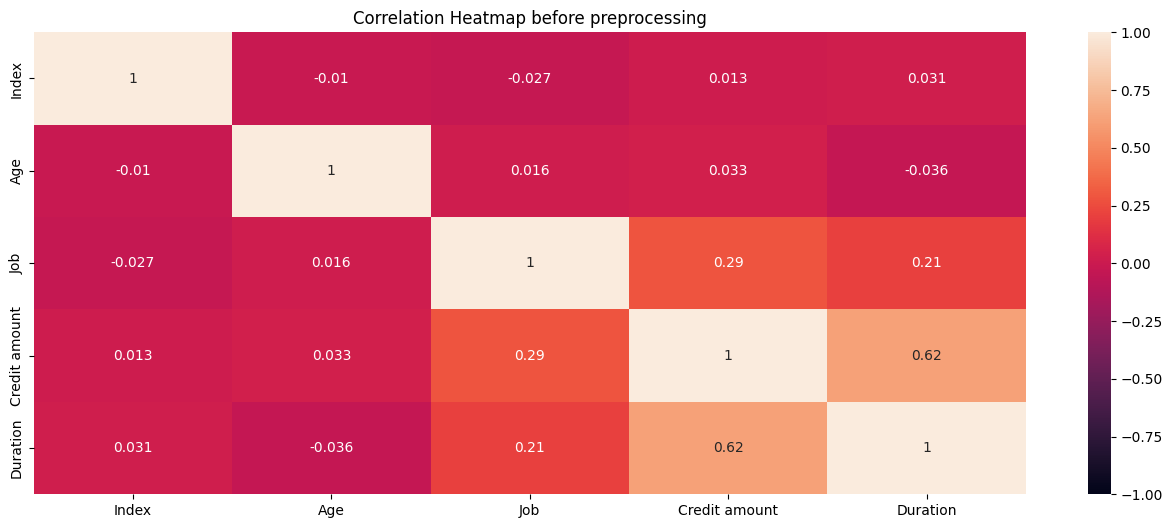

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(credit.corr(), vmin=-1, vmax=1, annot=True);
plt.title('Correlation Heatmap before preprocessing')
plt.show()

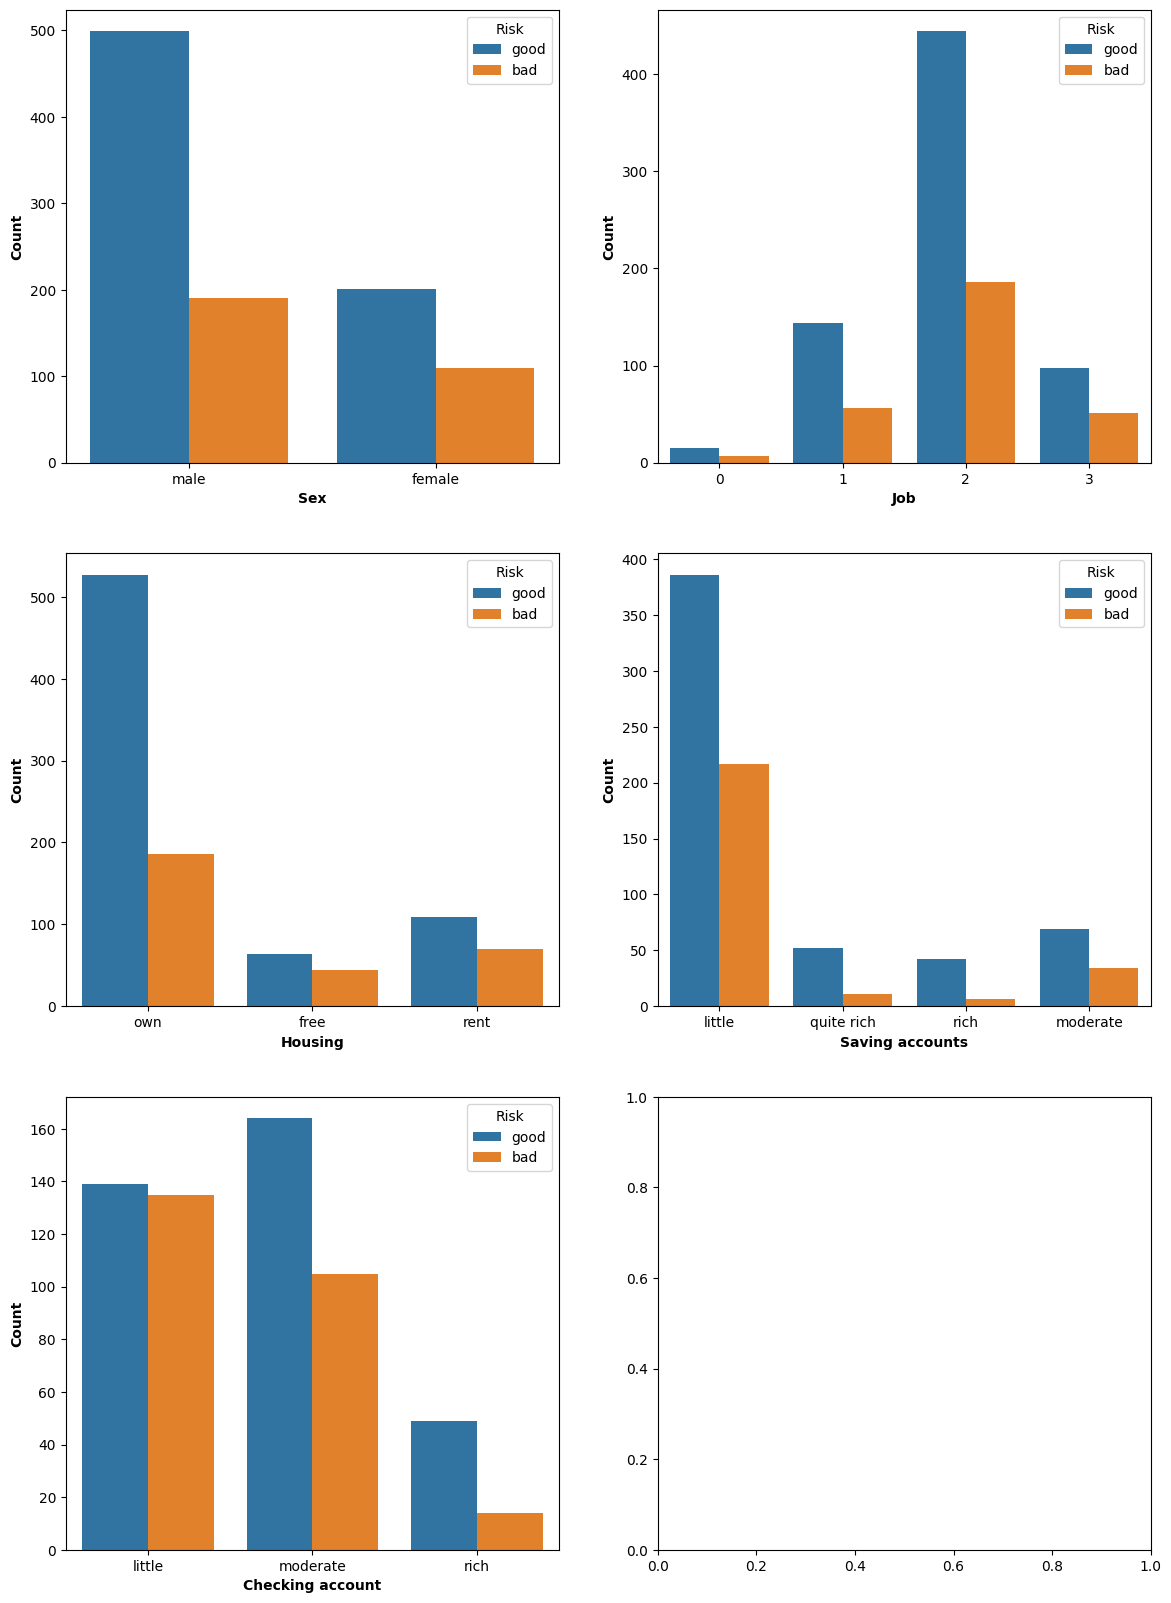

In [ ]:
df_cat =  [ 'Sex', 'Job', 'Housing', 'Saving accounts','Checking account']

fig, axs = plt.subplots(3, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=credit, ax=axs[i], hue =credit['Risk'])
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

DATA PREPROCESSING

In [ ]:
mode_val = credit['Saving accounts'].mode()[0]
credit['Saving accounts'].fillna(mode_val, inplace=True)

In [ ]:
mode_val = credit['Checking account'].mode()[0]
credit['Checking account'].fillna(mode_val, inplace=True)

In [ ]:
credit.isna().sum()

Index               0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
print(credit['Saving accounts'].value_counts())

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


In [ ]:
credit['Saving accounts']= credit['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other', 'NA':'other' })

In [ ]:
credit['Checking account']= credit['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [ ]:
le = LabelEncoder()
credit['Purpose'] = le.fit_transform(credit['Purpose'])
credit['Saving accounts'] = le.fit_transform(credit['Saving accounts'])
credit['Checking account'] = le.fit_transform(credit['Checking account'])
credit['Housing'] = le.fit_transform(credit['Housing'])

In [ ]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Purpose'].unique().tolist())
print("The various Saving accounts are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Saving accounts'].unique().tolist())
print("The various Checking account are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Checking account'].unique().tolist())
print("The various Housing options are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Housing'].unique().tolist())

The various purposes are:  ['free', 'own', 'rent'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]
The various Saving accounts are:  ['free', 'own', 'rent'] 
And the hot encoded numbers for the same are [0, 2, 1]
The various Checking account are:  ['free', 'own', 'rent'] 
And the hot encoded numbers for the same are [0, 1, 2]
The various Housing options are:  ['free', 'own', 'rent'] 
And the hot encoded numbers for the same are [1, 0, 2]


In [ ]:
credit = credit.replace({'Risk': {'good': 0,
                                'bad': 1}})

In [ ]:
credit = credit.replace({'Sex': {'male': 0,
                                'female': 1}})

In [ ]:
credit = credit.drop('Index', axis=1)

In [ ]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,1,0,0,1169,6,5,0
1,22,1,2,1,0,1,5951,48,5,1
2,49,0,1,1,0,0,2096,12,3,0
3,45,0,2,0,0,0,7882,42,4,0
4,53,0,2,0,0,0,4870,24,1,1


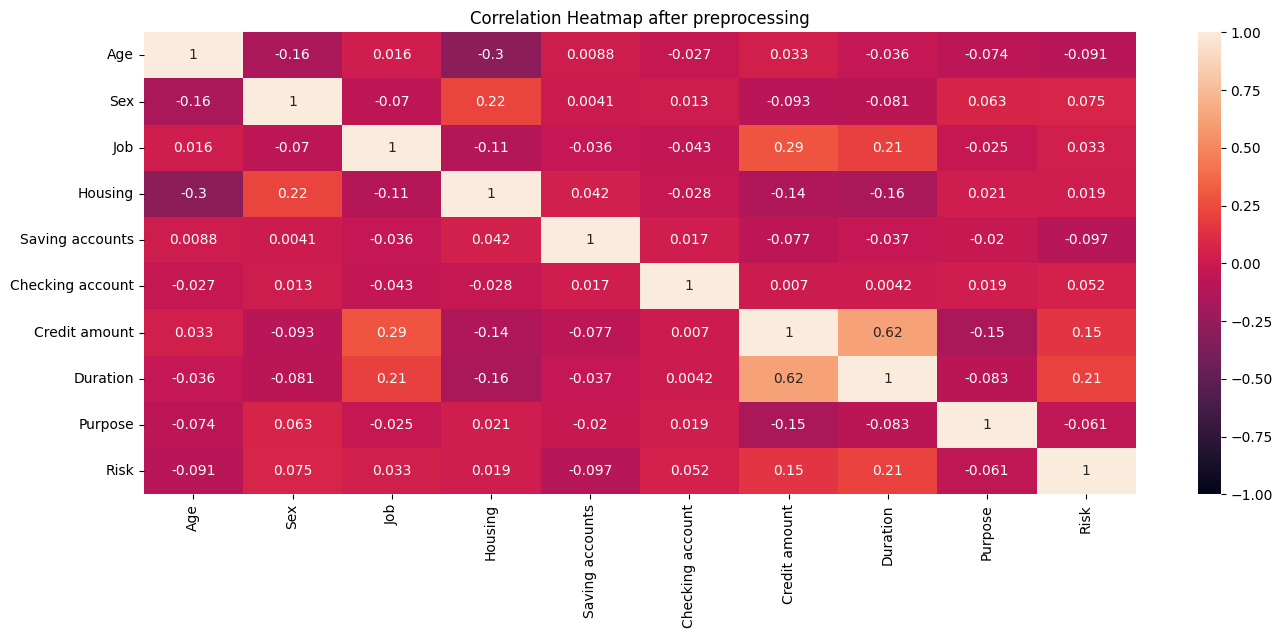

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(credit.corr(), vmin=-1, vmax=1, annot=True);
plt.title('Correlation Heatmap after preprocessing')
plt.show()

In [ ]:
# drop the 'Risk' column from the DataFrame to create the feature matrix
X = credit.drop('Risk', axis=1)
# create the target vector
y = credit['Risk']
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [ ]:
print('x_train: ', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (700, 9)
x_test:  (300, 9)
y_train:  (700,)
y_test:  (300,)


In [ ]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

SCALING

In [ ]:
#Scaling the original data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
#Scaling the Smote data
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_smote)
X_test_tr = scaler.transform(X_test)

DUMMY CLASSIFIER

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the dummy classifier to the training data
dummy_clf.fit(X_train, y_train)

# Evaluate the performance of the dummy classifier on the testing data
accuracy = dummy_clf.score(X_test, y_test)
print("Accuracy of the dummy classifier: {:.2f}%".format(accuracy * 100))

Accuracy of the dummy classifier: 70.00%


Random Forest

In [ ]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train_tr, y_train_smote, cv=5)
print('Random Forest Cross-validation Scores:', scores.mean())

Random Forest Cross-validation Scores: 0.7357142857142858


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': [None, 5, 10],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 4),
              'max_features': ['auto', 'sqrt', 'log2']}

# Create a random forest classifier
rf = RandomForestClassifier()

# Create a randomized search object
rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50,
                                 cv=5, random_state=42, n_jobs=-1)

# Fit the randomized search object to the data
rand_search.fit(X_train_tr, y_train_smote)

# Get the best hyperparameters
best_params = rand_search.best_params_
print('Best Random Forest Hyperparameters:', best_params)


Best Random Forest Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 121}


In [ ]:
#Applying RF for original data
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
Rf.fit(X_train_sc,y_train)
yhat = Rf.predict(X_test_sc)

In [ ]:
print(classification_report(y_test, yhat))
print(f'Accuracy of RF for original Data: ',round(accuracy_score(y_test, yhat), 2))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       210
           1       0.60      0.32      0.42        90

    accuracy                           0.73       300
   macro avg       0.68      0.62      0.62       300
weighted avg       0.71      0.73      0.70       300

Accuracy of RF for original Data:  0.73


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(max_features = 'auto', min_samples_leaf =  1, min_samples_split = 4, n_estimators = 162)
Rf.fit(X_train_tr,y_train_smote)
pred = Rf.predict(X_test_tr)

In [ ]:
print(classification_report(y_test, pred))
#creating a list to append scores
acc = []
rf_acc = accuracy_score(y_test, pred)
acc.append(rf_acc)
print(f'Accuracy of RF for smote Data: ',round(rf_acc, 6))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       210
           1       0.48      0.43      0.46        90

    accuracy                           0.69       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.68      0.69      0.69       300

Accuracy of RF for smote Data:  0.69


KNN

In [ ]:
k_values = list(range(5, 15))

# Use cross-validation to evaluate the performance of each k value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_tr, y_train_smote, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k value that gives the best performance
best_k = k_values[np.argmax(cv_scores)]
print("Best k value:", best_k)

Best k value: 5


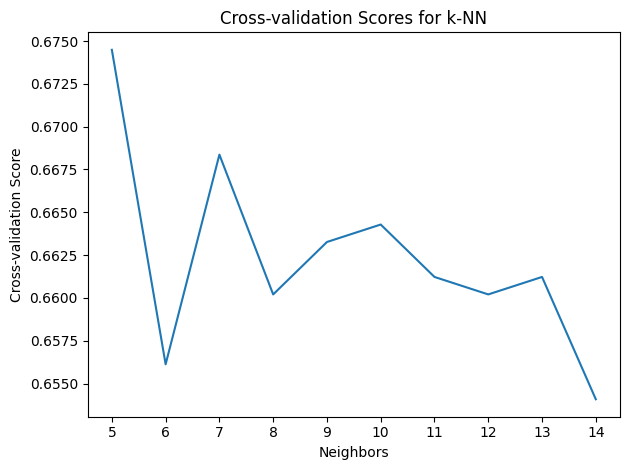




we can see "8" has the best score





In [ ]:
plt.plot(k_values, cv_scores);
plt.title('Cross-validation Scores for k-NN');
plt.xticks(k_values);
plt.xlabel('Neighbors');
plt.ylabel('Cross-validation Score');
plt.tight_layout();
plt.show();
print('''


we can see "8" has the best score


''')

GridsearchCV

In [ ]:
# Define the hyperparameter range to test
param_grid = {'n_neighbors': list(range(1, 31))}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tr, y_train_smote)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Best Hyperparameters: {'n_neighbors': 1}
Best Accuracy Score: 0.6836734693877551


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_sc, y_train)
knn_yhat = knn.predict(X_test_sc)
print(classification_report(y_test, knn_yhat))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       210
           1       0.28      0.10      0.15        90

    accuracy                           0.65       300
   macro avg       0.49      0.50      0.46       300
weighted avg       0.57      0.65      0.59       300



In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_tr, y_train_smote)
knn_pred = knn.predict(X_test_tr)
print(classification_report(y_test, knn_pred))
knn_acc = accuracy_score(y_test, knn_pred)
acc.append(knn_acc)
print(f'Accuracy of KNN for smote Data: ',round(knn_acc, 6))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       210
           1       0.34      0.24      0.29        90

    accuracy                           0.63       300
   macro avg       0.53      0.52      0.52       300
weighted avg       0.60      0.63      0.61       300

Accuracy of KNN for smote Data:  0.633333


SVM

In [ ]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
}
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train_tr, y_train_smote)
best_params = grid_search.best_params_
print(best_params)
print("Best Accuracy Score:", grid_search.best_score_)

{'C': 1, 'kernel': 'rbf'}
Best Accuracy Score: 0.6969387755102041


In [ ]:
svm = SVC(kernel='rbf')

# Fit the classifier to the scaled training data
svm.fit(X_train_sc, y_train)

# Use the trained classifier to predict the labels for the scaled test data
svm_yhat = svm.predict(X_test_sc)

# Compute and print the classification report for the predicted labels
report = classification_report(y_test, svm_yhat)
print(report)




              precision    recall  f1-score   support

           0       0.72      0.96      0.83       210
           1       0.62      0.14      0.23        90

    accuracy                           0.72       300
   macro avg       0.67      0.55      0.53       300
weighted avg       0.69      0.72      0.65       300



In [ ]:
svc = SVC(random_state = 22, probability = True)
svc.fit(X_train_tr, y_train_smote)
svm_pred = svc.predict(X_test_tr)
print(classification_report(y_test, svm_pred))
svc_acc = accuracy_score(y_test, svm_pred)
acc.append(svc_acc)
print(f'Accuracy of SVM for smote Data: ',round(svc_acc, 6))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       210
           1       0.45      0.50      0.47        90

    accuracy                           0.66       300
   macro avg       0.61      0.62      0.61       300
weighted avg       0.68      0.66      0.67       300

Accuracy of SVM for smote Data:  0.663333


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tr, y_train_smote)
best_params = grid_search.best_params_
print(best_params)
print("Best Accuracy Score:", grid_search.best_score_)


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.6826530612244899


In [ ]:
decision_tree.fit(X_train_sc, y_train)

# Use the trained classifier to predict the labels for the scaled test data
dtc_yhat = decision_tree.predict(X_test_sc)

# Compute and print the classification report for the predicted labels
report = classification_report(y_test, dtc_yhat)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       210
           1       0.38      0.41      0.39        90

    accuracy                           0.62       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.62      0.62       300



In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, criterion='gini', random_state=22)
decision_tree.fit(X_train_tr, y_train_smote)
dt_pred = decision_tree.predict(X_test_tr)
print(classification_report(y_test, dt_pred))

dt_acc = accuracy_score(y_test, dt_pred)
print(f'Accuracy of Decision Tree for SMOTE Data:', round(dt_acc, 6))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       210
           1       0.46      0.54      0.50        90

    accuracy                           0.67       300
   macro avg       0.62      0.63      0.63       300
weighted avg       0.69      0.67      0.68       300

Accuracy of Decision Tree for SMOTE Data: 0.67


ACCURACY COMPARISION

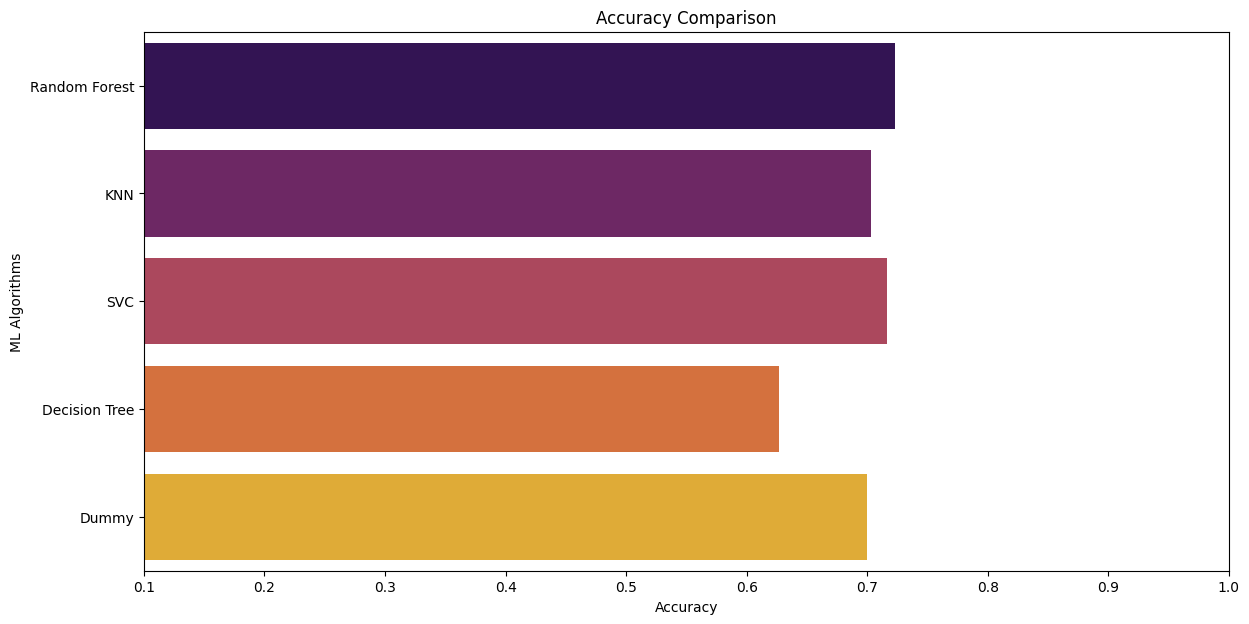

In [ ]:
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Dummy', DummyClassifier(strategy="most_frequent"))
]

# Train and evaluate the classifiers
results = []
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    results.append((name, acc))

# Create a dictionary of classifier names and their accuracies
acc_dict = {name: acc for name, acc in results}

# Define the order of the classifier names for the bar chart
model = ['Random Forest', 'KNN', 'SVC', 'Decision Tree', 'Dummy']

# Plot the bar chart
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
ax = sns.barplot(x=list(acc_dict.values()), y=model, palette='inferno')
ax.set_xlim(0.1, 1.0)
plt.show()

RECALL, PRECISION, ACCURACY

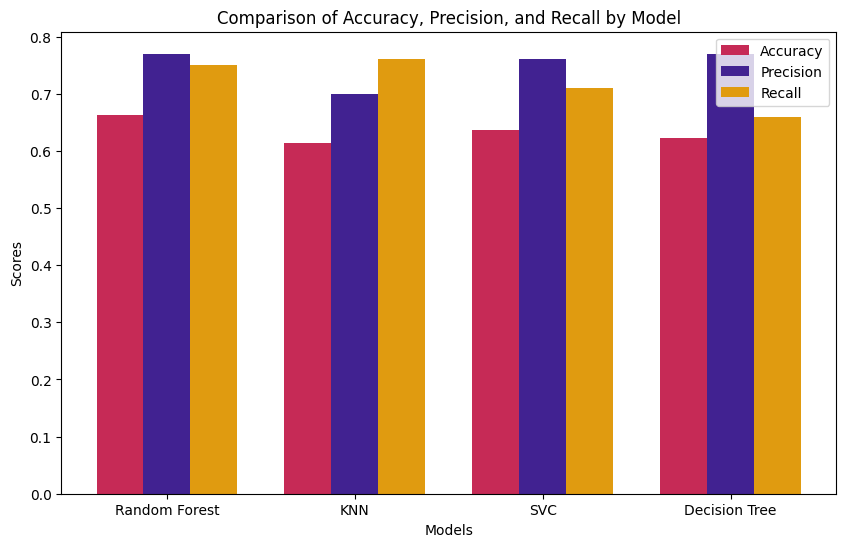

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
models = ['Random Forest', 'KNN', 'SVC', 'Decision Tree']
accuracy = [0.663333,  0.613333, 0.636667, 0.623333]
precision = [0.77, 0.70, 0.76, 0.77]
recall = [0.75, 0.76, 0.71, 0.66]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
bar_width = 0.25

# Set positions of bars on x-axis
ind = np.arange(len(models))

colors = ['#c62a56', '#412291', '#e09b10']

# Plot accuracy, precision, and recall as grouped bars with custom palette
ax.bar(ind, accuracy, bar_width, label='Accuracy', color=colors[0])
ax.bar(ind + bar_width, precision, bar_width, label='Precision', color=colors[1])
ax.bar(ind + 2*bar_width, recall, bar_width, label='Recall', color=colors[2])

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy, Precision, and Recall by Model')
ax.set_xticks(ind + bar_width)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()

In [ ]:
ori_acc = [0.700000, 0.686734, 0.725510, 0.695918]

In [ ]:
acc = [0.663333,  0.613333, 0.636667, 0.623333]
model = ['Random Forest', 'KNN', 'SVM', 'Decision Tree']


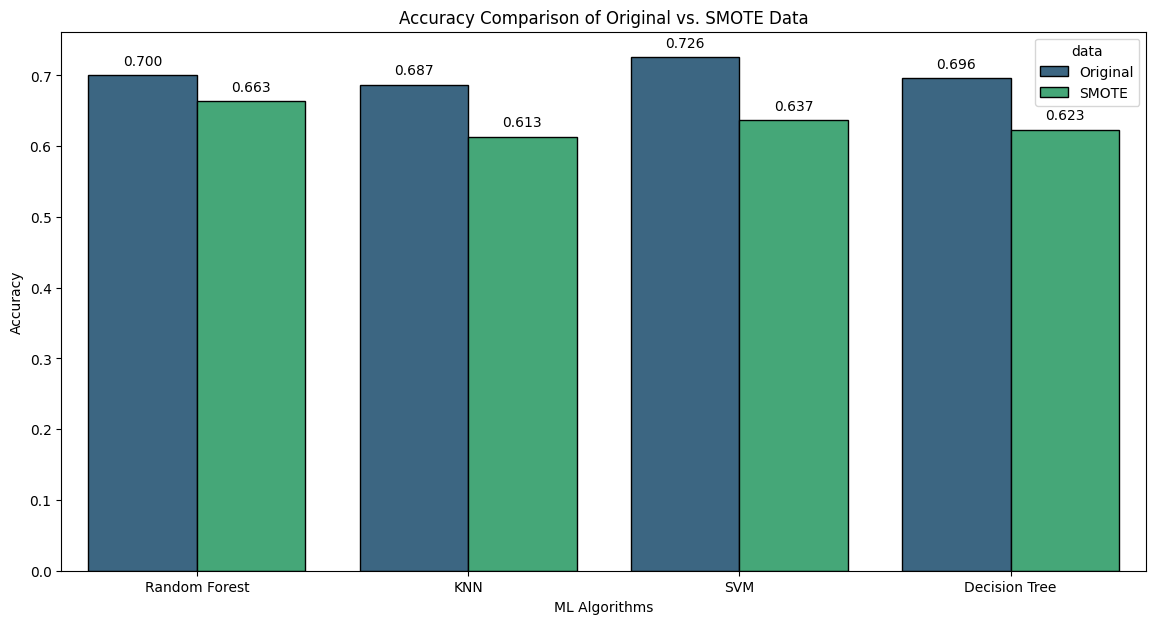

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a data frame for the results
df = pd.DataFrame({'model': model * 2, 'accuracy': ori_acc + acc, 'data': ['Original'] * len(model) + ['SMOTE'] * len(model)})

# plot the results
plt.figure(figsize=[14,7],dpi = 100, facecolor='white');

ax = sns.barplot(x='model', y='accuracy', hue='data', data=df, palette='viridis', edgecolor='black')

# add values on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=5, labels=[f'{h.get_height():.3f}' for h in container])

plt.title('Accuracy Comparison of Original vs. SMOTE Data');
plt.xlabel('ML Algorithms');
plt.ylabel('Accuracy');

plt.show()
